# Построение модели, предсказывающей температуру стали.

## Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

## Устройство дуговой ковшовой печи


Вместительность данных печей лежит в пределах 30 - 150 т. Их монтируют после сталеплавильной печи любого типа, например конвертера либо мартеновской печи. Работает ковшовая печь следующим образом: в тигель-ковш (который следует разогреть) заливают расплавленную сталь с помощью сталеразливочного ковша. Во время этого процесса следует отделить максимально много шлака, который образуется в плавильной печи и имеет значительный процент фосфора (оптимальный вариант – когда в сталеплавильной печи не было этапа раскисления, фосфор не перешел из шлака в сталь).

После этого в тигель-ковш помещают ферросплавы, которые необходимы, чтоб придать изготавливаемой стали нужный химический состав. Также, на данном этапе применяют шлакообразующие. Далее, необходимо поместить тигель-ковш под водоохлаждаемый свод, в отверстии которого расположены 3 графитированных электрода. Потом свод опускается и закрепляется на упорах тигель-ковша. Используя гидропривод, можно поворачивать свод в сторону, пока идет простой. Для того чтобы экранировать футеровку от излучения, электроды располагаются ниже верхнего уровня шлака. Далее, запускается процесс дугового нагрева. В зависимости от типа обработки стали, скорость прогревания металла может быть разной. Чаще всего она составляет около 5 °С/мин. Оптимальная температура, которую необходимо поддерживать в тигель-ковше, равняется примерно 1600 °С. Также, необходимо поддерживать восстановительную атмосферу, исключив, при этом попадание в нее кислорода. Для этого под свод поступает инертный газ.

Источник https://metallplace.ru/about/stati-o-chernoy-metalurgii/kovsh-pech/

Более подробное описание технологии работы ковша печи https://portalpedagoga.ru/servisy/publik/publ?id=32382


## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;
- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas.csv` — данные о продувке сплава газом;
- `data_temp.csv` — результаты измерения температуры;
- `data_wire.csv` — данные о проволочных материалах (объём);
- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

In [1]:
# Для анализа данных проинсталлировал библиотеку ProfileReport
%pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

# Оставил загрузку бибилиотеки здесь, поскольку после каждого перезапуска ядра надо инсталить заново, а после перехода к моделированию библиотека не нужна    
from pandas_profiling import ProfileReport

     \ 21.8 MB 156 kB/s/s
     |████████████████████████████████| 102 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 709 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 78.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 80.1 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 57.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 64.4 MB/s eta 0:00:01
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262573 sha256=f2c3a6c18a92ce9833bc09e5caf4141438bd5856e887fe02cbf1b8a35a54f049
  Stored in directory: /tmp/pip-ephem-wheel-cache-vy802m4l/wheels/de/d6/dc/61cc65cce70dda40583eef25ac13cbffb18dcd67295810e1c3
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=2f3d4cb916b2f3aaedf7e63dba84401d816d2681f55c59ee4eb28c7e5333ea27
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a4

## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time # подсчет времени

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV  # Разделение выборок

# Модели
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression # Линейная регрессия
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

## Импорт данных

In [2]:
# Загружаем файлы 
df_arc, df_bulk, df_bulk_time, df_gas, df_temp, df_wire, df_wire_time = (pd.read_csv('/datasets/final_steel/data_arc.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_bulk.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_bulk_time.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_gas.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_temp.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_wire.csv'),
                                                                        pd.read_csv('/datasets/final_steel/data_wire_time.csv'))



## Анализ данных

In [3]:
# Для удобства создадим функцию для анализа данных

def description (data):
    display(data.info())
    display(data.head())
    display(data.describe())

### Анализ данных об электродах

In [4]:
description(df_arc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [5]:
# Приведем название столбцов к змеиному виду
df_arc.columns=['key', 'start_heating', 'end_heating', 'active_power', 'reactive_power']

# Проверим результат
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   start_heating   14876 non-null  object 
 2   end_heating     14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Выявлено нехарактерное значение реактивной мощности со знаком минус. 

Реактивная мощность может быть отрицательной, если нагрузка имеет активно-ёмкостный характер. http://infofiz.ru/index.php/mirinf/item/363-shatalov 

Примеры емкостных нагрузок: конденсаторные батареи, корректоры коэффициента мощности, синхронные двигатели, ЛЭП сверхвысокого напряжения. http://electrik.info/main/school/1648-chto-takoe-induktivnaya-i-emkostnaya-nagruzka.html

Все это говорит о том, что это значение - есть ошибка системы измерения. Посмотрим на диаграмму распределения, а также оценим количество таких показателей.

<function matplotlib.pyplot.show(close=None, block=None)>

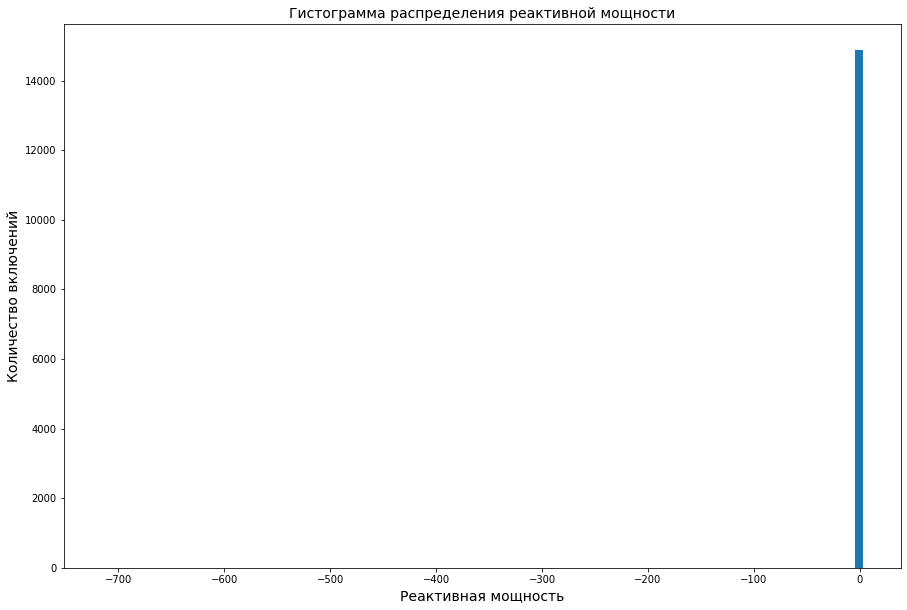

In [6]:
# Построим гистограммы распределения реактивной мощности
df_arc['reactive_power'].plot( kind='hist', figsize=(15, 10), bins=100)
plt.title('Гистограмма распределения реактивной мощности', size=14)
plt.xlabel("Реактивная мощность", size=14)
plt.ylabel("Количество включений", size=14)
plt.show

In [7]:
df_arc['reactive_power'].sort_values()

9780    -715.504924
5596       0.020806
2419       0.021154
4914       0.022485
4633       0.022983
            ...    
13760      2.335088
12424      2.397032
9361       2.459959
9226       2.504206
7799       2.676388
Name: reactive_power, Length: 14876, dtype: float64

Выявили, что отрицательное значение единично, посмотрим на все значения этой записи

In [8]:
df_arc.loc[9780]

key                              2116
start_heating     2019-07-24 00:44:48
end_heating       2019-07-24 00:46:37
active_power                 0.495782
reactive_power            -715.504924
Name: 9780, dtype: object

In [9]:
# Удалим ошибочную запись
df_arc_1 = df_arc.drop(9780)

<function matplotlib.pyplot.show(close=None, block=None)>

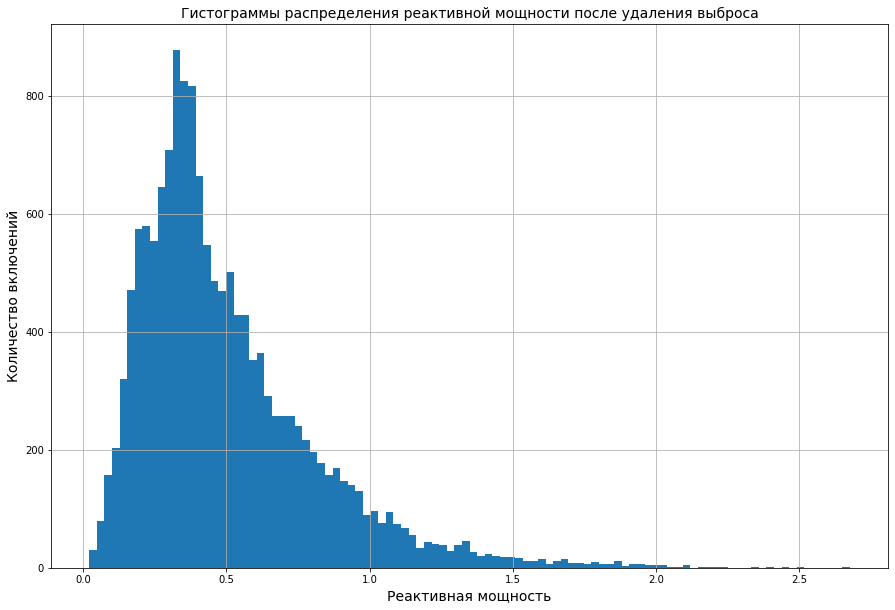

In [10]:
# Построим гистограммы распределения реактивной мощности после удаления выброса
df_arc_1['reactive_power'].plot( kind='hist', figsize=(15, 10), bins=100, grid=True)
plt.title('Гистограммы распределения реактивной мощности после удаления выброса', size=14)
plt.xlabel("Реактивная мощность", size=14)
plt.ylabel("Количество включений", size=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

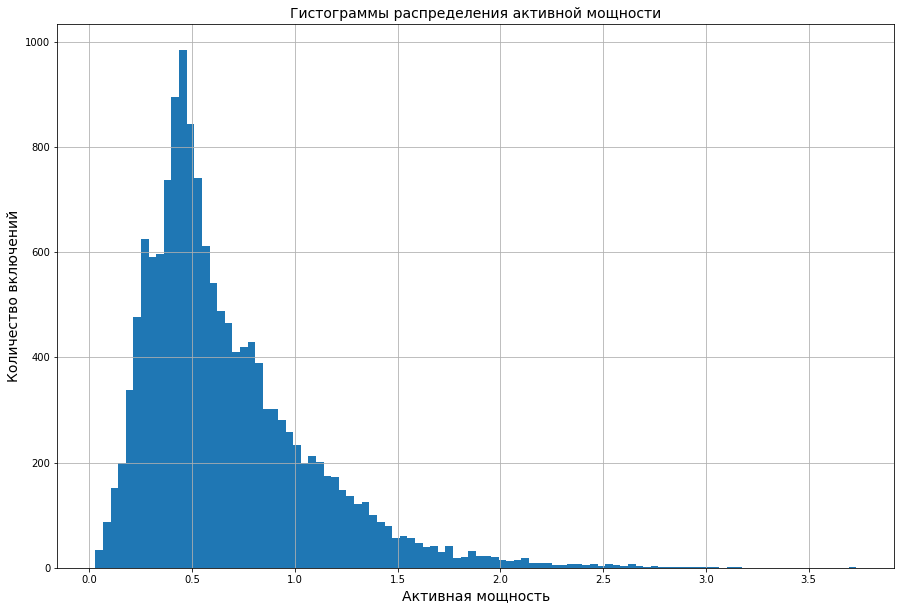

In [11]:
# Построим гистограммы распределения активной мощности
df_arc['active_power'].plot( kind='hist', figsize=(15, 10), bins=100, grid=True)
plt.title('Гистограммы распределения активной мощности', size=14)
plt.xlabel("Активная мощность", size=14)
plt.ylabel("Количество включений", size=14)
plt.show

In [12]:
# Расчитаем полную мощность по формуле (Полная мощность = √ (Активная мощность2 + Реактивная мощность2)) и добавим столбец
df_arc['full_power'] = (df_arc['active_power']**2 + df_arc['reactive_power']**2)**0.5
df_arc_1['full_power'] = (df_arc_1['active_power']**2 + df_arc_1['reactive_power']**2)**0.5

<function matplotlib.pyplot.show(close=None, block=None)>

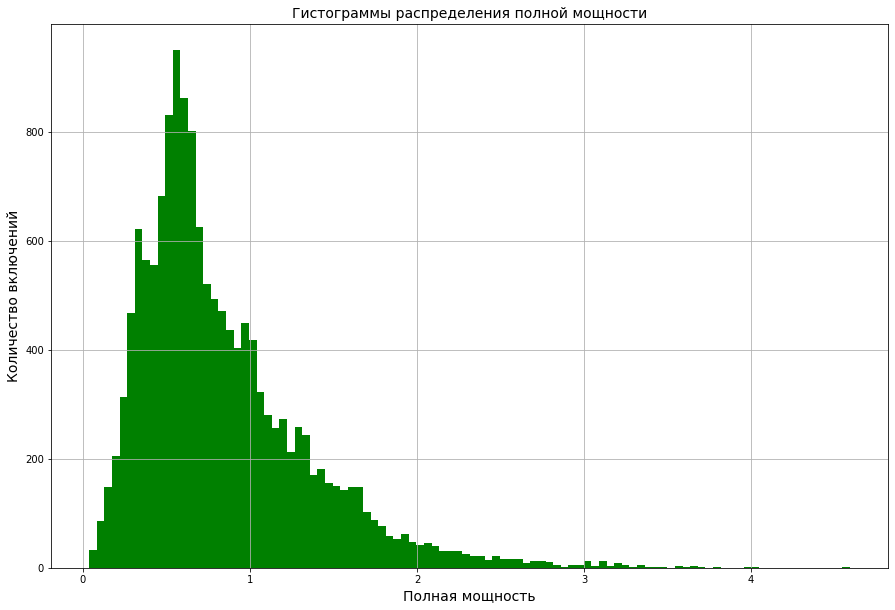

In [13]:
# Построим гистограммы распределения полной мощности
df_arc_1['full_power'].plot( kind='hist', figsize=(15, 10), bins=100, color='green', grid=True,)
plt.title('Гистограммы распределения полной мощности', size=14)
plt.xlabel("Полная мощность", size=14)
plt.ylabel("Количество включений", size=14)
plt.show

In [14]:
# Приведем столбцы 'start_heating' и 'end_heating' к формату дата/время
df_arc['start_heating'] = pd.to_datetime(df_arc['start_heating'],format='%Y-%m-%d %H:%M:%S')
df_arc['end_heating'] = pd.to_datetime(df_arc['end_heating'],format='%Y-%m-%d %H:%M:%S')

In [15]:
# Посчитаем длительность нагрева и приведем его в секундах
df_arc['heating_duration'] = (df_arc['end_heating'] - df_arc['start_heating'])/ np.timedelta64(1, 's')
# Посмотрим результат
display(df_arc)

,key,start_heating,end_heating,active_power,reactive_power,full_power,heating_duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148.0
...,...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,0.640648,157.0
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,0.855559,180.0
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,0.874560,184.0
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,0.264489,57.0


In [16]:
# Посмотрим описательную статистику по длительности нагрева
df_arc['heating_duration'].describe()

count    14876.000000
mean       171.670946
std         98.186803
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: heating_duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

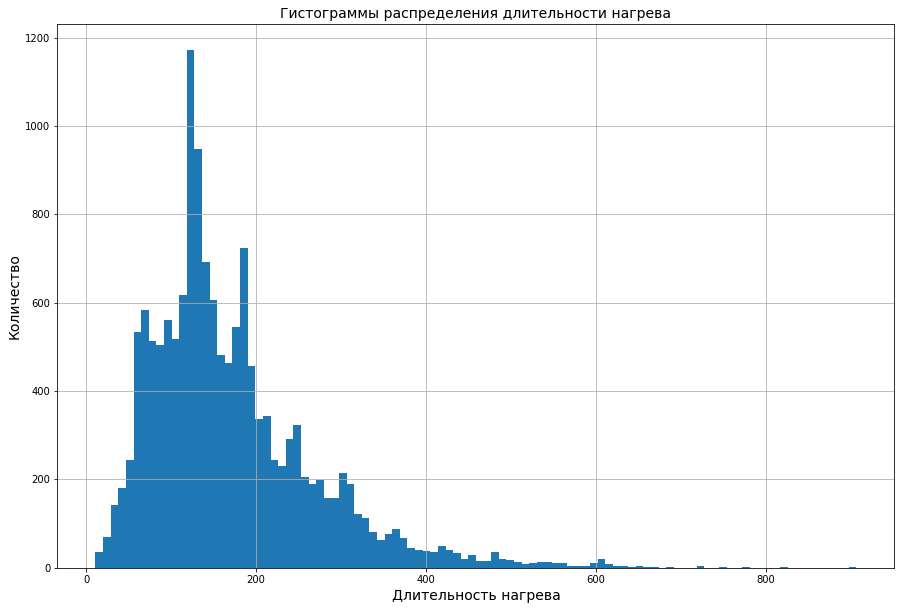

In [17]:
# Построим гистограммы распределения длительности нагрева
df_arc['heating_duration'].plot( kind='hist', figsize=(15, 10), bins=100, grid=True)
plt.title('Гистограммы распределения длительности нагрева', size=14)
plt.xlabel("Длительность нагрева", size=14)
plt.ylabel("Количество", size=14)
plt.show

Выводы:
- Обнаружен выброс значений по реактивной мощности, причем единичный
- Судя по гистограммам распределения для активной и реактивной мощности распределние близкое к нормальному, причем после удаления выброса они коррелируются, что соответствует законам физики
- Пропусков не выявлено
- Есть длительные нагревы, предположу что это особенности технологического процесса

Вопросы:
Какое действие будет наиболее обоснованно: 
- удалить запись с выбросом? (Показалось наиболее оптимальным, поскольку значение не последнее в эксперименте)
- взять среднее или медианное значение для реактивной мощности вместо выброса?
- вычислить коэффициент пересчета из других значений? (Сомнительная точность, проще уже медианное значение)

### Анализ данных о подаче сыпучих материалов (объём и время)

In [18]:
# Проанализируем таблицу таблицу объемов подачи сыпучих материалов
description(df_bulk)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [19]:
# Приведем название столбцов к змеиному виду
df_bulk.columns=['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 
                'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15']
# Посмотрим результат
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


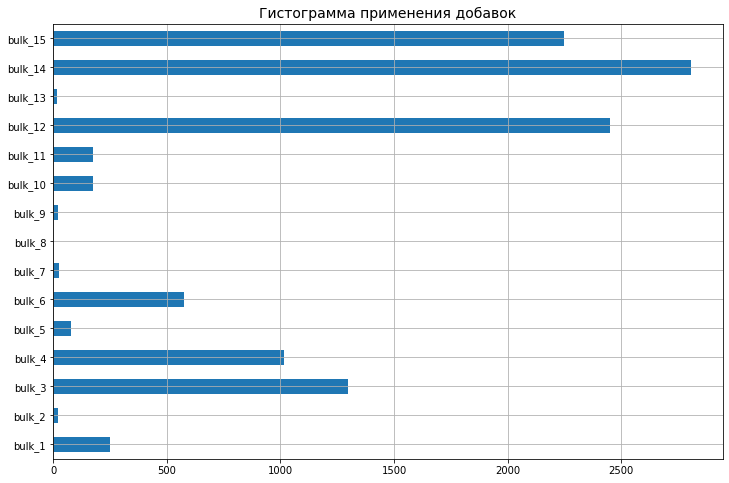

In [20]:
# Построим гистограмму распределения частоты применеия добавок
df_bulk.drop(['key'], axis=1).count().plot(kind='barh', grid=True, figsize=(12,8));
plt.title('Гистограмма применения добавок', fontsize=14);

In [21]:
# Заполним пропуски в значениях массы материала значением 0
df_bulk = df_bulk.fillna(0)

In [22]:
# Проанализируем таблицу таблицу времени подачи сыпучих материалов
description(df_bulk_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [23]:
# Приведем название столбцов к змеиному виду
df_bulk_time.columns=['key', 'bulk_1_t', 'bulk_2_t', 'bulk_3_t', 'bulk_4_t', 'bulk_5_t', 'bulk_6_t', 'bulk_7_t', 'bulk_8_t', 
                'bulk_9_t', 'bulk_10_t', 'bulk_11_t', 'bulk_12_t', 'bulk_13_t', 'bulk_14_t', 'bulk_15_t']

# Посмотрим результат
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   key        3129 non-null   int64 
 1   bulk_1_t   252 non-null    object
 2   bulk_2_t   22 non-null     object
 3   bulk_3_t   1298 non-null   object
 4   bulk_4_t   1014 non-null   object
 5   bulk_5_t   77 non-null     object
 6   bulk_6_t   576 non-null    object
 7   bulk_7_t   25 non-null     object
 8   bulk_8_t   1 non-null      object
 9   bulk_9_t   19 non-null     object
 10  bulk_10_t  176 non-null    object
 11  bulk_11_t  177 non-null    object
 12  bulk_12_t  2450 non-null   object
 13  bulk_13_t  18 non-null     object
 14  bulk_14_t  2806 non-null   object
 15  bulk_15_t  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [24]:
# Заполним пропуски в значениях времени подачи материала значением 0
df_bulk_time = df_bulk_time.fillna(0)

In [25]:
# Создадим переменную с перечнем столбцов
bt_col=['bulk_1_t', 'bulk_2_t', 'bulk_3_t', 'bulk_4_t', 'bulk_5_t', 'bulk_6_t', 'bulk_7_t', 'bulk_8_t', 
                'bulk_9_t', 'bulk_10_t', 'bulk_11_t', 'bulk_12_t', 'bulk_13_t', 'bulk_14_t', 'bulk_15_t']

# Приведем столбцы к формату дата/время
df_bulk_time[bt_col] = df_bulk_time[bt_col].astype('datetime64')

# Добавим столбец с максимальным временем для каждой партии
df_bulk_time['max_bulk_time'] = df_bulk_time[bt_col].max(axis=1)

Выводы
- Данные таблиц с указанием времени и объемов коррелируются
- Наиболее часто применяемый сыпучий материал bulk_14
- Значение NaN указано в тех случаях, когда материал не добавлялся
- Данные из этих таблиц имеют технологическое обоснование, поэтому ничего удалять не будем

### Анализ данных о продувке сплава газом

In [26]:
description(df_gas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [28]:
profile_gas = ProfileReport(df_gas)
profile_gas

NameError: name 'ProfileReport' is not defined

In [27]:
# Приведем название столбцов к змеиному виду
df_gas.columns=['key', 'gas']

# Посмотрим результат
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


<function matplotlib.pyplot.show(close=None, block=None)>

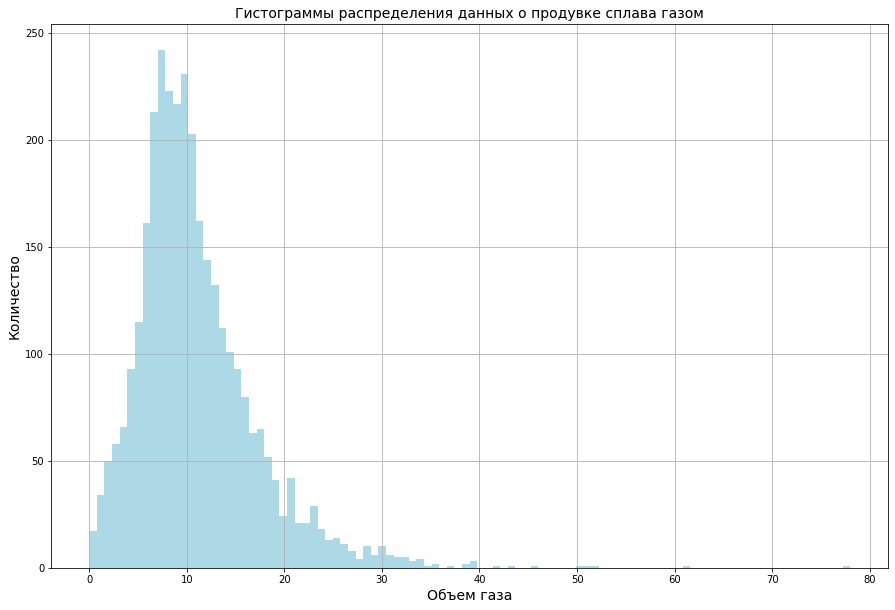

In [28]:
# Построим гистограммы распределения данных о продувке сплава газом
df_gas['gas'].plot( kind='hist', figsize=(15, 10), bins=100, color='lightblue', grid=True)
plt.title('Гистограммы распределения данных о продувке сплава газом', size=14)
plt.xlabel("Объем газа", size=14)
plt.ylabel("Количество", size=14)
plt.show

Выводы
Распределение имеет ряд неожиданно высоких значений, однако это скорее всего технологически обоснованно
Вопросы
- каково максимальное допустимое значение по газу?
- в чем это измерялось? куб.м.? (Для работы модели это не критично, но в целом интересно)

### Анализ результатов измерения температуры

In [29]:
description(df_temp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


,key,Температура
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [30]:
# Приведем название столбцов к змеиному виду
df_temp.columns = ['key', 'measurement_time', 'temp']
# Посмотрим результат
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   key               15907 non-null  int64  
 1   measurement_time  15907 non-null  object 
 2   temp              13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [31]:
# Приведем столбец 'measurement_time' к формату дата/время
df_temp['measurement_time'] =  pd.to_datetime(df_temp['measurement_time'],format='%Y-%m-%d %H:%M:%S')

<function matplotlib.pyplot.show(close=None, block=None)>

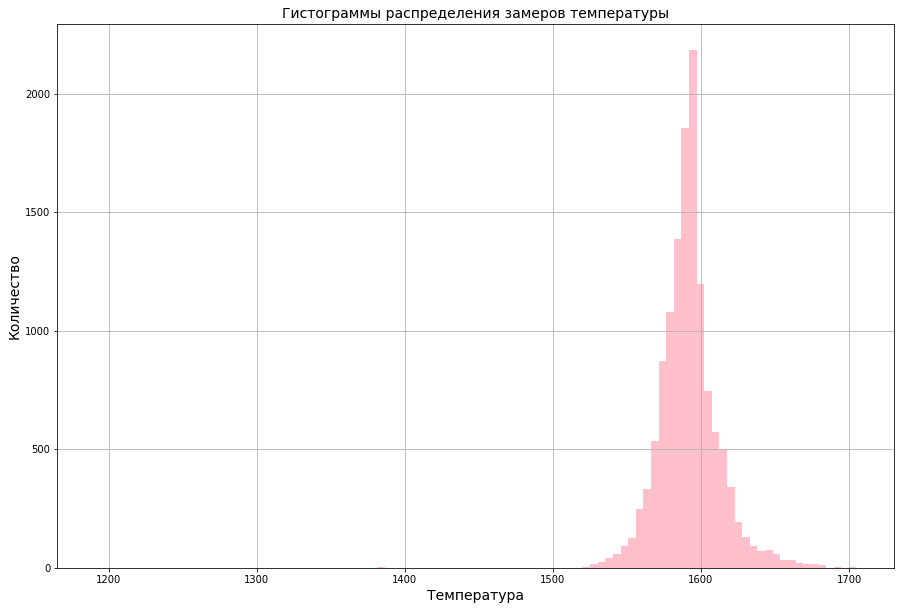

In [32]:
# Построим гистограммы распределения замеров температуры
df_temp['temp'].plot( kind='hist', figsize=(15, 10), bins=100, color='pink', grid=True)
plt.title('Гистограммы распределения замеров температуры', size=14)
plt.xlabel("Температура", size=14)
plt.ylabel("Количество", size=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

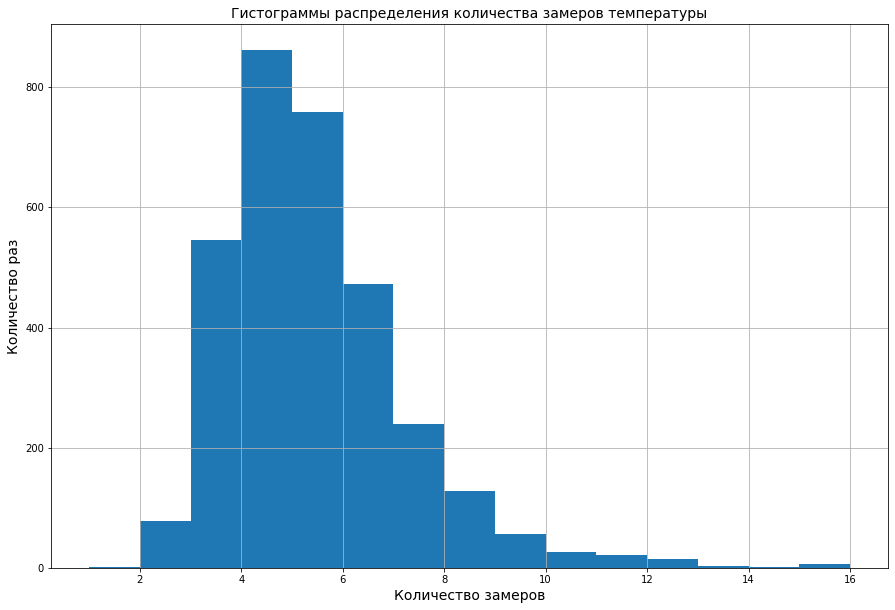

In [33]:
# Построим гистограммы распределения количества замеров температуры
df_temp['key'].value_counts().plot( kind='hist', figsize=(15, 10), bins=15, grid=True)
plt.title('Гистограммы распределения количества замеров температуры', size=14)
plt.xlabel("Количество замеров", size=14)
plt.ylabel("Количество раз", size=14)
plt.show

Выводы
Есть пропуски в значениях температуры, их 2901. Поскольку температура будет являться целевым признаком, пропуски нужно удалить.
Количество замеров температуры неоднородно по партиям
Вопросы
Какие показатели температуры брать целевым признаком? На всех этапах? 

### Анализ данных о проволочных материалах (объём и время)

In [34]:
# Проанализируем таблицу таблицу объемов подачи проволочных материалов
description(df_wire)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [35]:
# Приведем название столбцов к змеиному виду
df_wire.columns=['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 
                'wire_9']
# Посмотрим результат
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


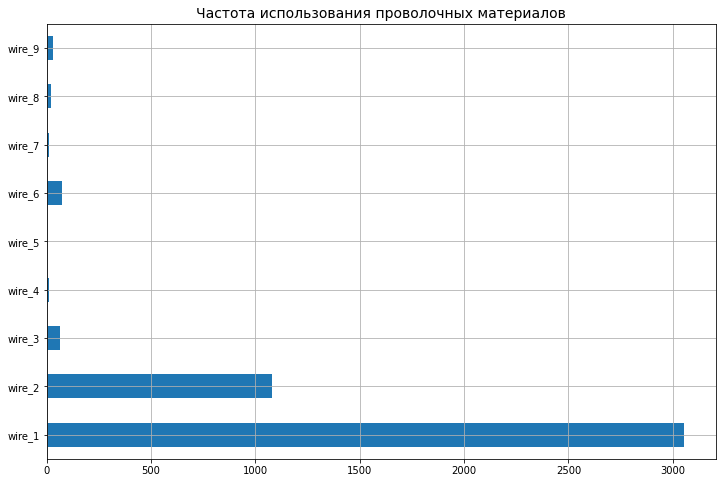

In [36]:
# Построим гистограмму распределения частоты применения проволочных материалов
df_wire.drop(['key'], axis=1).count().plot(kind='barh', grid=True, figsize=(12,8));
plt.title('Частота использования проволочных материалов', fontsize=14);

In [37]:
# ЗЗаполним пропуски в значениях массы проволоки значением 0
df_wire = df_wire.fillna(0)

In [38]:
# Проанализируем таблицу таблицу времени подачи проволочных материалов
description(df_wire_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [39]:
# Приведем название столбцов к змеиному виду
df_wire_time.columns=['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 
                'wire_9']
# Посмотрим результат
df_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [40]:
# Заполним пропуски в значениях времени подачи проволоки значением 0
df_wire_time = df_wire_time.fillna(0)

In [41]:
# Создадим переменную с перечнем столбцов
wt_col=['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']

# Приведем столбцы к формату дата/время
df_wire_time[wt_col] = df_wire_time[wt_col].astype('datetime64')

# Добавим столбец с максимальным временем для каждой партии
df_wire_time['max_wire_time'] = df_wire_time[wt_col].max(axis=1)

Выводы
- Данные таблиц с указанием времени и объемов коррелируются
- Наиболее часто применяемый проволочный материал wire_1
- Значение NaN указано в тех случаях, когда проволочный материал не добавлялся
- Данные из этих таблиц имеют технологическое обоснование, поэтому ничего удалять не будем

Вопросы:
По ТЗ

1. "Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки." Поскольку нет данных о выполнении требования по химсоставу и температуре мы предполагаем, что все представленные эксперименты привели к нужному результату. Правильно?
2. Не очень понятно на каком этапе нужно предсказать температуру стали. После каждого добавления сыпучих материалов, проволоки, газа? 

По датасетам 
1. Какое действие будет наиболее обоснованно при работе с единичным выбросом: 
- удалить запись с выбросом? (Наверное неоптимально, поскольку мы не сможем учесть часть израсходованной электроэнергии)
- взять среднее или медианное значение для реактивной мощности вместо выброса?
- вычислить коэффициент пересчета из других значений? (Сомнительная точность, проще уже медианное значение)
2. Какой параметр брать в качестве учета потребленной мощности? Активную? (Если так, то вопрос №1 отпадает) Полную? Исходя из статьи https://electrosam.ru/glavnaja/jelektrotehnika/aktivnaia-i-reaktivnaia-moshchnost/ при наличии компенсационного оборудования вроде как только активную мощность учитывают, но я так понимаю это идеальный случай.
3. Какие значения по активной (3.731596) и реактивной (2.676388) мощности в данном случае считаются нормой? 	
4. Каково максимальное допустимое значение по газу?
5. Газ - в чем это измерялось? куб.м.? (Для работы модели это не критично, но в целом интересно)
6. Количество замеров температуры неоднородно по партиям, отсюда вопрос - какие показатели температуры брать целевым признаком? На всех этапах?
7. Не сильно ли низкие показатели температуры 1200 °С при оптимальной температуре, которую необходимо поддерживать в тигель-ковше, равняется примерно 1600 °С
7. По сыпучим материалам и проволоке - я правильно понял, что пропущенные значения это недобавленный в конкретной плавке материал и их можно просто заменить 0?

План работы

1. Загрузка и анализ данных
2. Предобработка данных 
2. Объединение данных в единую таблицу. За ключ возьмем номер партии key, используя время как параметр, по которому воспроизводится последовательность операций и замеров. (Последовательность подачи сыпучих материалов, проволоки и нагревов существенны)
3. Разделение полученной таблицы на три части (тренировочная 60/ валидационная 20/ тестовая 20)
4. Обучение нескольких моделей и выбор наилучшей


## Обработка и подготовка данных

### Обработка и подготовка данных по температуре

In [42]:
# Поскольку температура будет целевым признаком - удалим строки с отсутствующими данными о температуре
df_temp = df_temp.dropna()

# Посмотрим результат
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13006 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13006 non-null  int64         
 1   measurement_time  13006 non-null  datetime64[ns]
 2   temp              13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 406.4 KB


In [43]:
# Поскольку температура плавления стали от 1350 С (Данные взял в том чиле тут http://thermalinfo.ru/svojstva-materialov/metally-i-splavy/temperatura-plavleniya-i-kipeniya-metallov-plotnost-i-teploprovodnost)
# Посмотрим сколько значений меньше 1350
df_temp[df_temp['temp']<1350]

# Удалим эти строки, поскольку это скорее всего ошибка замера, либо менее вероятное - переход в другое агрегатное состояние
df_temp = df_temp[df_temp['temp']>1350]

# Посмотрим результат
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13001 entries, 0 to 15902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13001 non-null  int64         
 1   measurement_time  13001 non-null  datetime64[ns]
 2   temp              13001 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 406.3 KB


In [44]:
# Начнем формирование датафрейма для модели
# Добавим время начала обработки
df_analysis = df_temp.loc[df_temp.groupby('key')['measurement_time'].idxmin()].copy()

# Добавим время конца обработки
df_analysis = df_analysis.merge(df_temp.loc[df_temp.groupby('key')['measurement_time'].idxmax()], on='key')

# Для наглядности переименуем столбцы
df_analysis.columns = ['key', 'start_time', 'start_temp', 'finish_time', 'finish_temp']

# Посмотрим результат
df_analysis

,key,start_time,start_temp,finish_time,finish_temp
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
3210,3237,2019-08-31 22:44:04,1569.0,2019-08-31 22:44:04,1569.0
3211,3238,2019-08-31 23:30:31,1584.0,2019-08-31 23:30:31,1584.0
3212,3239,2019-09-01 01:31:47,1598.0,2019-09-01 01:31:47,1598.0
3213,3240,2019-09-01 02:39:01,1617.0,2019-09-01 02:39:01,1617.0


In [45]:
# Посмотрим на партии с одним замером температуры
(df_analysis.loc[df_analysis['start_time'] == df_analysis['finish_time']]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 192 to 3214
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          740 non-null    int64         
 1   start_time   740 non-null    datetime64[ns]
 2   start_temp   740 non-null    float64       
 3   finish_time  740 non-null    datetime64[ns]
 4   finish_temp  740 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 34.7 KB


In [46]:
# Удалим партии с одним замером
df_analysis  = df_analysis.loc[df_analysis['start_time'] < df_analysis['finish_time']]

# Добавим столбец с длительностью работы с партией
df_analysis['processing_time'] = (df_analysis['finish_time'] - df_analysis['start_time'])/ np.timedelta64(1, 's')

# Посмотри результат
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2476
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   key              2475 non-null   int64         
 1   start_time       2475 non-null   datetime64[ns]
 2   start_temp       2475 non-null   float64       
 3   finish_time      2475 non-null   datetime64[ns]
 4   finish_temp      2475 non-null   float64       
 5   processing_time  2475 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1)
memory usage: 135.4 KB


### Обработка и подготовка данных об электродах

In [47]:
# Удалим ошибочную запись, содержащую показатель реактивной мощности равный -715.504924
df_arc = df_arc.drop(9780)

In [48]:
# Для наглядности выведу первые пять строк датафрейма по электродам
df_arc.head(5)

,key,start_heating,end_heating,active_power,reactive_power,full_power,heating_duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,1.193639,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,0.959010,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,0.896038,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,1.970470,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,0.807239,148.0


In [49]:
# Посмотрим корреляцию между показателями активной, реактивной и общей мощности
df_arc[['active_power', 'reactive_power', 'full_power']].corr()

,active_power,reactive_power,full_power
active_power,1.000000,0.963182,0.994279
reactive_power,0.963182,1.000000,0.986237
full_power,0.994279,0.986237,1.000000


Учитывая корреляцию между параметрами мощностей при формировании датафрейма для анализа ограничимся полной мощностью

In [50]:
# Сформируем и добавим суммарную длительность нагрева электродов в каждой партии в датафрэйм
df_analysis = df_analysis.merge(df_arc.groupby('key')['heating_duration'].sum().reset_index(), on='key')

# Сформируем и добавим общую мощность нагрева электродов в каждой партии в датафрэйм
df_analysis = df_analysis.merge(df_arc.groupby('key')['full_power'].sum().reset_index(), on='key')

# Поскольку не допустимы любые манипуляции со сталью после последнего замера температуры добавим время последнего нагрева
df_analysis = df_analysis.merge(df_arc[['key', 'end_heating']].loc[df_arc.groupby('key')['end_heating'].idxmax()], on='key')

# Исключим все партии с нагревом после замера
df_analysis = df_analysis.loc[df_analysis['finish_time'] >= df_analysis['end_heating']]

# Посмотрим результат
df_analysis.head()

,key,start_time,start_temp,finish_time,finish_temp,processing_time,heating_duration,full_power,end_heating
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,861.0,1098.0,5.826395,2019-05-03 11:28:37
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,1305.0,811.0,3.649216,2019-05-03 11:53:18
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,1300.0,655.0,2.989534,2019-05-03 12:32:19
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,388.0,741.0,3.814962,2019-05-03 12:57:50
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,762.0,869.0,4.035758,2019-05-03 13:33:55


### Обработка и подготовка данных о продувке сплава газом

Эффективность обработки стали на АКП (АГРЕГАТ КОВШ-ПЕЧЬ) зависит от продолжительности и интенсивности продувки. Расход аргона м3 / т стали:

до 0,5 – достаточен для усреднения температуры и химического состава металлического расплава;
до 1,0 – влияет на удаление неметаллических включений;
2 - 3– для эффективной дегазации жидкой стали.
ссылка на источник https://portalpedagoga.ru/servisy/publik/publ?id=32382

то есть в нашем случае 100 т * 0,5 куб.м. = 50 куб.м. возможно используется только для продувки для усреднения температуры, а следовательно, 78 куб.м. вполне рабочая величина

Поскольку данные по добавлению газа приведены сразу в привязке к партиям без разбивки на части, а вышеприведенные соотношения говорят о том, что данные по газу ошибок не содержат - добавим их в таблицу для анализа

In [51]:
# Сформируем и добавим общую мощность нагрева электродов в каждой партии в датафрэйм
df_analysis = df_analysis.merge(df_gas, on='key')

# Посмотрим результат
df_analysis.head()

,key,start_time,start_temp,finish_time,finish_temp,processing_time,heating_duration,full_power,end_heating,gas
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,861.0,1098.0,5.826395,2019-05-03 11:28:37,29.749986
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,1305.0,811.0,3.649216,2019-05-03 11:53:18,12.555561
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,1300.0,655.0,2.989534,2019-05-03 12:32:19,28.554793
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,388.0,741.0,3.814962,2019-05-03 12:57:50,18.841219
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,762.0,869.0,4.035758,2019-05-03 13:33:55,5.413692


### Обработка и подготовка данных о подаче сыпучих материалов (объем и время)

Поскольку добавление сыпучих материалов происходит в несколько этапов и разбивка на этапы технологически обоснованна, добавим  в датафрейм все подачи сыпучих материалов

In [52]:
# Добавим все подачи сыпучих материалов
df_analysis = df_analysis.merge(df_bulk, on='key')

# Добавим максимальное время добавки сыпучих материалов для исключения добавок, произведенных после последнего замера температуры
df_analysis = df_analysis.merge(df_bulk_time[['key', 'max_bulk_time']], on='key')

# Удалим партии, в которых засыпка проводилась после последнего измерения температуры
df_analysis  = df_analysis.loc[df_analysis['finish_time'] > df_analysis['max_bulk_time']]

### Обработка и подготовка данных о подаче проволоки (объем и время)

Поскольку, как и в предыдущем пункте, добавление проволоки происходит в несколько этапов и разбивка на этапы технологически обоснованна, добавим в датафрейм все подачи проволоки

In [53]:
# Сформируем и добавим суммарную длительность нагрева электродов в каждой партии в датафрэйм
df_analysis = df_analysis.merge(df_wire, on='key')

# Добавим максимальное время добавки сыпучих материалов для исключения добавок, произведенных после последнего замера температуры
df_analysis = df_analysis.merge(df_wire_time[['key', 'max_wire_time']], on='key')

# Удалим партии, в которых проволока подавалась проводилась после последнего измерения температуры
df_analysis  = df_analysis.loc[df_analysis['finish_time'] > df_analysis['max_wire_time']]

### Подготовка датафрейма для моделей df_analysis

In [54]:
# Проверим на присутствие данных во всех ячейках
description(df_analysis)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2206 entries, 0 to 2205
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               2206 non-null   int64         
 1   start_time        2206 non-null   datetime64[ns]
 2   start_temp        2206 non-null   float64       
 3   finish_time       2206 non-null   datetime64[ns]
 4   finish_temp       2206 non-null   float64       
 5   processing_time   2206 non-null   float64       
 6   heating_duration  2206 non-null   float64       
 7   full_power        2206 non-null   float64       
 8   end_heating       2206 non-null   datetime64[ns]
 9   gas               2206 non-null   float64       
 10  bulk_1            2206 non-null   float64       
 11  bulk_2            2206 non-null   float64       
 12  bulk_3            2206 non-null   float64       
 13  bulk_4            2206 non-null   float64       
 14  bulk_5            2206 n

None

,key,start_time,start_temp,finish_time,finish_temp,processing_time,heating_duration,full_power,end_heating,gas,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,max_wire_time
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,861.0,1098.0,5.826395,2019-05-03 11:28:37,29.749986,...,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:11:41
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,1305.0,811.0,3.649216,2019-05-03 11:53:18,12.555561,...,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 11:46:10
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,1300.0,655.0,2.989534,2019-05-03 12:32:19,28.554793,...,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:13:47
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,388.0,741.0,3.814962,2019-05-03 12:57:50,18.841219,...,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 12:48:05
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,762.0,869.0,4.035758,2019-05-03 13:33:55,5.413692,...,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-05-03 13:32:06


,key,start_temp,finish_temp,processing_time,heating_duration,full_power,gas,bulk_1,bulk_2,bulk_3,...,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.0,2206.000000,2206.000000,2206.000000,2206.000000
mean,1254.674977,1587.480508,1593.476428,1905.600181,805.296464,3.939270,11.416322,3.418858,1.501813,48.320943,...,120.218948,101.809961,17.750332,3.415285,0.323642,0.0,1.033396,0.006715,0.328669,0.305258
std,712.453731,23.539677,11.249919,1289.346644,340.852227,1.781897,6.399068,12.358789,19.604080,76.203281,...,84.150301,43.141306,33.592174,28.700919,4.888078,0.0,8.929316,0.211359,4.523207,3.414538
min,1.000000,1519.000000,1541.000000,234.000000,57.000000,0.257637,0.008399,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,643.250000,1571.000000,1587.000000,1225.000000,576.000000,2.722846,7.300649,0.000000,0.000000,0.000000,...,0.000000,73.113300,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1255.500000,1587.000000,1593.000000,1650.500000,777.000000,3.777024,10.131497,0.000000,0.000000,0.000000,...,107.000000,100.245598,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1865.750000,1603.000000,1598.000000,2317.250000,993.000000,4.897557,14.285916,0.000000,0.000000,81.000000,...,204.000000,127.108801,23.419240,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2499.000000,1660.000000,1653.000000,23537.000000,4189.000000,21.564771,77.995040,185.000000,325.000000,454.000000,...,405.000000,330.314424,282.780152,385.008668,113.231044,0.0,180.454575,8.490040,102.762401,62.025600


Обнаружили, что в столбце 'wire_5' все значения равны 0

In [55]:
# Удалим столбцы времени и столбец 'wire_5'
df_analysis = df_analysis.drop(['start_time', 'finish_time', 'end_heating', 'max_bulk_time', 'max_wire_time', 'wire_5'], axis=1)


### Оценка мультиколлинеарности датафрейма для моделей df_analysis

In [56]:
# Сформируем таблицу для дальнейшего анализа
corr = df_analysis.corr()
display(corr)

,key,start_temp,finish_temp,processing_time,heating_duration,full_power,gas,bulk_1,bulk_2,bulk_3,...,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9
key,1.000000,-0.003623,-0.093495,0.005778,-0.037527,-0.023347,-0.051062,-0.076977,-0.006699,-0.016180,...,-0.119477,-0.023466,-0.007329,0.036106,-0.028597,0.050508,-0.008955,0.038016,-0.037400,0.027996
start_temp,-0.003623,1.000000,0.297657,0.216641,-0.377710,-0.422184,0.045674,0.076565,0.145486,-0.112487,...,-0.186233,-0.062917,0.259228,-0.103057,-0.004073,0.078123,0.020817,0.054260,-0.031082,0.003560
finish_temp,-0.093495,0.297657,1.000000,0.097005,0.288094,0.281073,0.061149,-0.074140,-0.085123,-0.040953,...,0.116613,0.271150,0.324302,-0.221343,-0.049825,-0.164071,-0.087143,-0.140741,-0.011734,-0.032155
processing_time,0.005778,0.216641,0.097005,1.000000,0.575734,0.552450,0.464049,0.155233,0.263204,0.025064,...,0.190902,0.127632,0.154806,0.057976,0.088418,0.278015,0.142940,0.172392,-0.011588,0.014255
heating_duration,-0.037527,-0.377710,0.288094,0.575734,1.000000,0.983019,0.392776,0.101395,0.039797,0.095998,...,0.464469,0.291866,0.058513,0.053412,0.035151,0.056772,0.044263,0.028599,0.018870,-0.009363
full_power,-0.023347,-0.422184,0.281073,0.552450,0.983019,1.000000,0.365763,0.094320,0.040595,0.098591,...,0.458439,0.318987,0.043783,0.051626,0.035088,0.060860,0.056252,0.027305,0.025915,-0.012164
gas,-0.051062,0.045674,0.061149,0.464049,0.392776,0.365763,1.000000,0.229506,0.222698,0.060069,...,0.257718,0.034108,0.104329,0.100161,0.105392,0.148845,0.110243,0.080836,0.120737,0.018818
bulk_1,-0.076977,0.076565,-0.074140,0.155233,0.101395,0.094320,0.229506,1.000000,0.231970,-0.009901,...,0.207371,-0.003225,0.000287,-0.009460,0.021011,0.151040,0.153444,0.086134,-0.020110,0.014342
bulk_2,-0.006699,0.145486,-0.085123,0.263204,0.039797,0.040595,0.222698,0.231970,1.000000,-0.048599,...,-0.147885,-0.109492,-0.174651,-0.040498,0.222838,0.699264,0.558705,0.431687,-0.005569,-0.006852
bulk_3,-0.016180,-0.112487,-0.040953,0.025064,0.095998,0.098591,0.060069,-0.009901,-0.048599,1.000000,...,0.010070,-0.007907,0.043041,0.089331,0.004352,-0.042004,0.005747,-0.020156,0.003994,0.004045


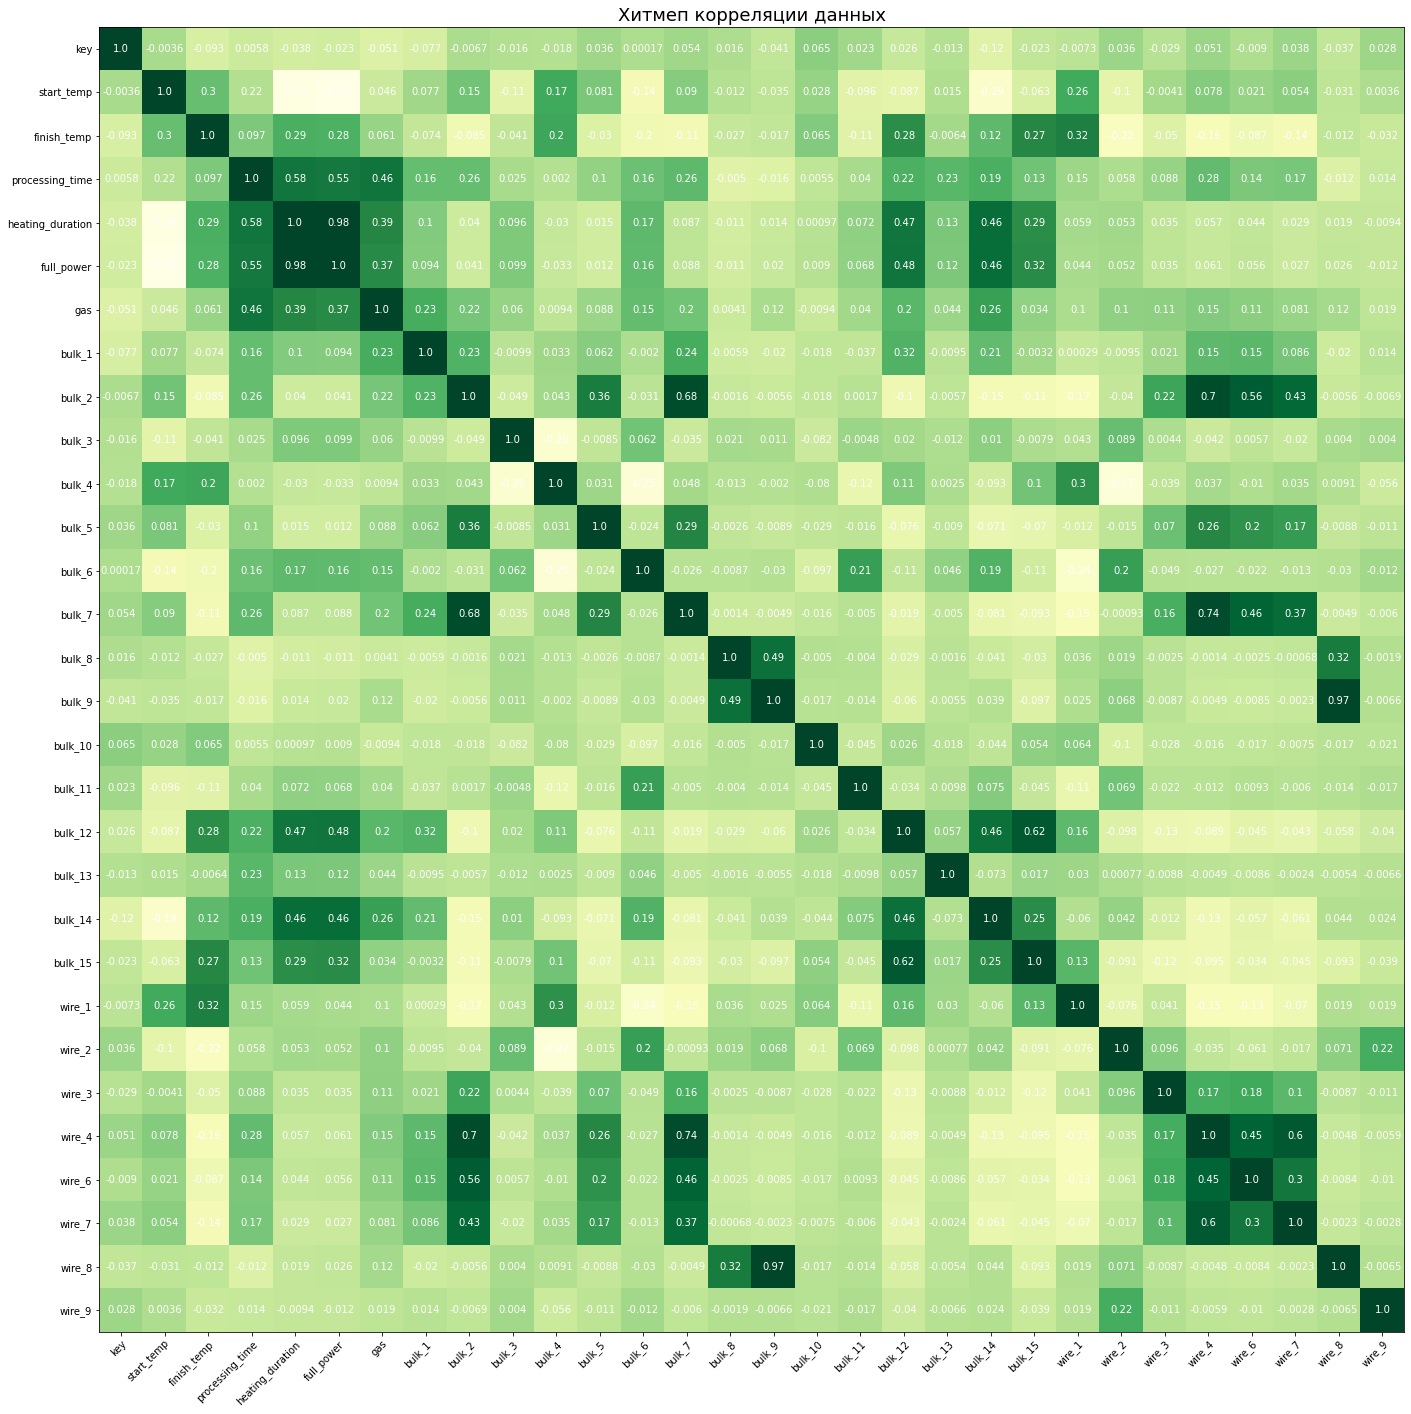

In [57]:
# Построим хитмэп
# Определим размер изображения
fig, ax = plt.subplots(figsize=(24,24))

# Сформируем подписи по осям
ax.set_xticks(np.arange(len(corr.index)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.index)

# Для обеспечения читаемости нижних подписей повренем их на 45 градусов
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.title('Хитмеп корреляции данных', size = 18)
data = corr.values

for i in range(len(corr.index)):
    for j in range(len(corr.index)):
        text = ax.text(j, i, '{:.2}'.format(data[i, j]),
                       ha="center", va="center", color="w")
        
im = ax.imshow(corr.corr(), cmap='YlGn')

In [58]:
# Выявили зависимости между агдд_power и heating_duration и bulk_9 и wire_8, удалим из датафрейма heating_duration и wire_8.
df_analysis = df_analysis.drop(['heating_duration', 'wire_8'], axis=1)

# Удалим столбец 'key'
df_analysis = df_analysis.drop(['key'], axis=1)

### Выводы

Во время подготовки данных были выполнены следующие действия

Температура:
- Удалены строки с температурой ниже 1350, как ошибочные
- Удалены строки с отсутствующими данными о замере температуры
- Удалены эксперименты с единственным замером
- Добавлен столбец с продолжительностью нагрева

Работа электродов:
- Удалили ошибочную запись, содержащую показатель реактивной мощности равный -715.504924
- Исключили все партии с нагревом после последнего замера

Данные о подаче сыпучих материалов:
- Удалены партии, в которых засыпка проводилась после последнего измерения температуры

Данные о подаче проволоки:
- Удалим партии, в которых проволока подавалась проводилась после последнего измерения температуры

Подготовка датафрейма:
- После формирования датафрейма для модели проверили на наличие данных во всех ячейках, обнаружили, что в столбце 'wire_5' все значения равны 0, соответственно его удалили

Оценка мультиколлинеарности:
- Построив Хитмэп выявили зависимости между full_power и heating_duration и bulk_9 и wire_8, удалим из датафрейма heating_duration и wire_8.

## Подготовка признаков

In [88]:
# Создание признаков
features = df_analysis.drop(['finish_temp'], axis=1)

# Создание целевого признака
target = df_analysis['finish_temp']

In [89]:
# отделим 20% данных для тестовой выборки
features_interm, features_test, target_interm, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

# отделим 25% данных для валидационной выборки
features_train, features_valid, target_train, target_valid = train_test_split(
    features_interm, target_interm, test_size=0.25, random_state=12345)

# Сформируем таблицу для проверки разделения выборки
data = {'Размер выборки':[len(features_train), len(features_valid), len(features_test)], 'В % от общего количества':[len(features_train)/len(features)*100, len(features_valid)/len(features)*100, len(features_test)/len(features)*100] } 
selections = pd.DataFrame(data, index =['Тренировочная выборка', 'Валидационная выборка', 'Тестовая выборка' ]) 
display(selections)

,Размер выборки,В % от общего количества
Тренировочная выборка,1323,59.972801
Валидационная выборка,441,19.990934
Тестовая выборка,442,20.036265


In [61]:
df_analysis

,start_temp,finish_temp,processing_time,full_power,gas,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,...,bulk_13,bulk_14,bulk_15,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_9
0,1571.0,1613.0,861.0,5.826395,29.749986,0.0,0.0,0.0,43.0,0.0,...,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0
1,1581.0,1602.0,1305.0,3.649216,12.555561,0.0,0.0,0.0,73.0,0.0,...,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0
2,1596.0,1599.0,1300.0,2.989534,28.554793,0.0,0.0,0.0,34.0,0.0,...,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0
3,1601.0,1625.0,388.0,3.814962,18.841219,0.0,0.0,0.0,81.0,0.0,...,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0
4,1576.0,1602.0,762.0,4.035758,5.413692,0.0,0.0,0.0,78.0,0.0,...,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,1570.0,1591.0,1137.0,3.986869,7.125735,0.0,0.0,21.0,0.0,0.0,...,0.0,129.0,223.0,89.150879,0.00000,0.0,0.0,0.0,0.0,0.0
2202,1554.0,1591.0,1618.0,5.057033,9.412616,0.0,0.0,0.0,63.0,0.0,...,0.0,129.0,226.0,114.179527,0.00000,0.0,0.0,0.0,0.0,0.0
2203,1571.0,1589.0,717.0,2.885017,6.271699,0.0,0.0,0.0,85.0,0.0,...,0.0,124.0,226.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0
2204,1591.0,1594.0,1302.0,4.143749,14.953657,0.0,0.0,90.0,0.0,0.0,...,0.0,129.0,207.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0


## Обучение моделей

### Обучение Dummy - модели

In [62]:
# Обучим модель предсказанию средних величин
dummy = DummyRegressor(strategy ="mean")
dummy.fit(features_train, target_train)

print('MAE на обучающей выборке', mean_absolute_error(target_valid, dummy.predict(features_valid)))
print('MAE на тестовой выборке', mean_absolute_error(target_test, dummy.predict(features_test)))

MAE на обучающей выборке 8.1958597497956
MAE на тестовой выборке 8.3817834826238


### Создание функции для сбора данных

In [63]:
#Создадим функцию для сбора данных
model_list = []
duration_list = []
duration_pred_list = []
mae_list = []
gread_time_list = []
mae_test_list = []

def summary (model, duration, duration_pred, mae, gread_time, mae_test):
    model_list.append(model)
    duration_list.append(duration)
    duration_pred_list.append(duration_pred)
    mae_list.append(mae)
    gread_time_list.append(gread_time)
    mae_test_list.append(mae_test)

###  Обучение модели LinearRegression()

In [159]:
%%time

model_lr = LinearRegression() 

# Начало отсчета времени обучения модели
start_time = time.time()

# Обучаем модель на тренировочной выборке
model_lr.fit(features_train, target_train) 

#Расчет времени обучения модели
duration = time.time() - start_time

# Начало отсчета времени предсказания
start_time = time.time()

# предсказания модели на валидационной выборке
target_predict = model_lr.predict(features_valid) 

#Расчет времени предсказания
duration_pred = time.time() - start_time

# Расчет MAE
result_l = mean_absolute_error(target_valid, target_predict)
print('MAE модели:', result_l)

# MAE на тестовой выборке
mae_test = mean_absolute_error(target_test, model_lr.predict(features_test))
print('MAE на тестовой выборке:', mae_test)

# Сбор данных
summary('LinearRegression', duration, duration_pred, result_l, 0, mae_test)

MAE модели: 5.681774587130354
MAE на тестовой выборке: 5.625905933021845
CPU times: user 18.3 ms, sys: 57.4 ms, total: 75.7 ms
Wall time: 14.3 ms


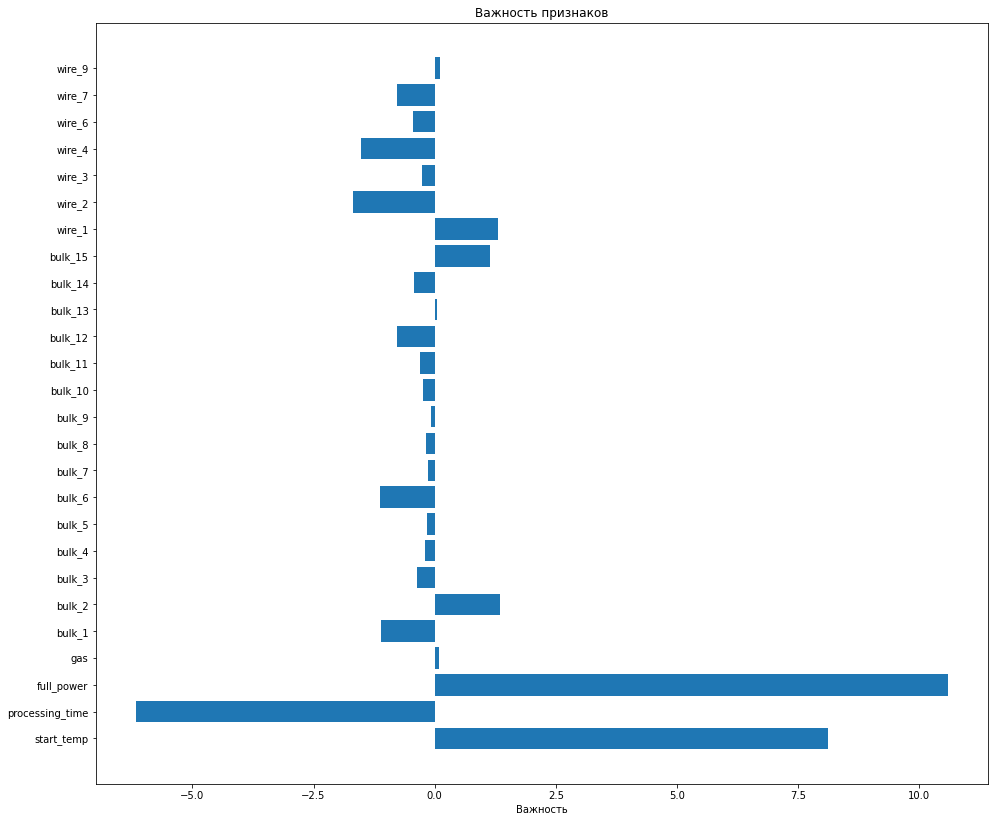

In [160]:
# Построим гистограмму важности признаков

# Проведем масштабирование параметров
scaler = StandardScaler().fit(features_train)
features_std = scaler.transform(features_train)

# Обучим модель на масштабированных параметрах
model_lr_std = model_lr.fit(features_std, target_train)

fig, ax = plt.subplots(figsize=(16,14))
plt.barh(features.columns, model_lr_std.coef_)
plt.title("Важность признаков")
plt.xlabel("Важность")
plt.show()

### Обучение модели CatBoostRegressor()

In [69]:
%%time

# Начало отсчета времени выполнения ячейки
start_time = time.time()

cat_model = CatBoostRegressor()

# Зададим подбираемые параметры
param_grid = {'learning_rate': [0.1, 0.3]}

grid_search_cat = GridSearchCV(estimator = cat_model, param_grid = param_grid, verbose = 0,
                           n_jobs = -1)

# Подберем параметры
grid_search_cat.fit(features_train, target_train)

#Расчет времени выполнения ячейки
duration_gread = time.time() - start_time

print(grid_search_cat.best_params_)

0:	learn: 10.8055829	total: 51ms	remaining: 51s
1:	learn: 10.5556744	total: 55.8ms	remaining: 27.8s
2:	learn: 10.2905504	total: 59.3ms	remaining: 19.7s
3:	learn: 10.1050659	total: 63.4ms	remaining: 15.8s
4:	learn: 9.9069246	total: 67.3ms	remaining: 13.4s
5:	learn: 9.7220979	total: 71.2ms	remaining: 11.8s
6:	learn: 9.5502398	total: 74.8ms	remaining: 10.6s
7:	learn: 9.4155165	total: 78.4ms	remaining: 9.72s
8:	learn: 9.2607116	total: 81ms	remaining: 8.92s
9:	learn: 9.1252690	total: 84.4ms	remaining: 8.36s
10:	learn: 9.0239233	total: 87.9ms	remaining: 7.9s
11:	learn: 8.9269045	total: 91ms	remaining: 7.5s
12:	learn: 8.8503133	total: 95.3ms	remaining: 7.23s
13:	learn: 8.7579897	total: 99ms	remaining: 6.97s
14:	learn: 8.6480004	total: 102ms	remaining: 6.69s
15:	learn: 8.5707832	total: 105ms	remaining: 6.46s
16:	learn: 8.4847422	total: 108ms	remaining: 6.26s
17:	learn: 8.4206717	total: 112ms	remaining: 6.1s
18:	learn: 8.3414026	total: 116ms	remaining: 5.98s
19:	learn: 8.2956353	total: 120ms	re

In [132]:
duration_gread

50.06584978103638

In [133]:
%%time

# Начало отсчета времени обучения модели
start_time = time.time()


# Обучим модель с подобранными параметрами
cat_model = CatBoostRegressor(learning_rate=0.1, 
                          iterations=2000, 
                          verbose=100,
                             depth=10) 

cat_model.fit(features_train, target_train)

#Расчет времени обучения модели
duration = time.time() - start_time

# Начало отсчета времени предсказания
start_time = time.time()

target_predict = cat_model.predict(features_valid)

#Расчет времени предсказания
duration_pred = time.time() - start_time

# Расчет MAE
result_cat = mean_absolute_error(target_valid, target_predict)
print('MAE модели:', result_cat)

# MAE на тестовой выборке
mae_test = mean_absolute_error(target_test, cat_model.predict(features_test))
print('MAE на тестовой выборке', mae_test)

# Сбор данных
summary('CatBoostRegressor', duration, duration_pred, result_cat, duration_gread, mae_test)

print(result_cat)

0:	learn: 10.7560937	total: 45.2ms	remaining: 1m 30s
100:	learn: 4.1243770	total: 3.53s	remaining: 1m 6s
200:	learn: 2.2499220	total: 6.81s	remaining: 1m
300:	learn: 1.4576984	total: 9.83s	remaining: 55.5s
400:	learn: 0.9650513	total: 13.1s	remaining: 52.2s
500:	learn: 0.6206989	total: 16.3s	remaining: 48.7s
600:	learn: 0.4283092	total: 19.5s	remaining: 45.3s
700:	learn: 0.2887229	total: 22.7s	remaining: 42.1s
800:	learn: 0.2005525	total: 25.8s	remaining: 38.5s
900:	learn: 0.1339262	total: 29.1s	remaining: 35.5s
1000:	learn: 0.0948007	total: 32.7s	remaining: 32.7s
1100:	learn: 0.0691804	total: 36s	remaining: 29.4s
1200:	learn: 0.0490368	total: 39.3s	remaining: 26.2s
1300:	learn: 0.0362731	total: 42.8s	remaining: 23s
1400:	learn: 0.0258227	total: 46.1s	remaining: 19.7s
1500:	learn: 0.0183859	total: 49.3s	remaining: 16.4s
1600:	learn: 0.0129325	total: 52.7s	remaining: 13.1s
1700:	learn: 0.0096696	total: 55.6s	remaining: 9.78s
1800:	learn: 0.0072999	total: 58.8s	remaining: 6.49s
1900:	lea

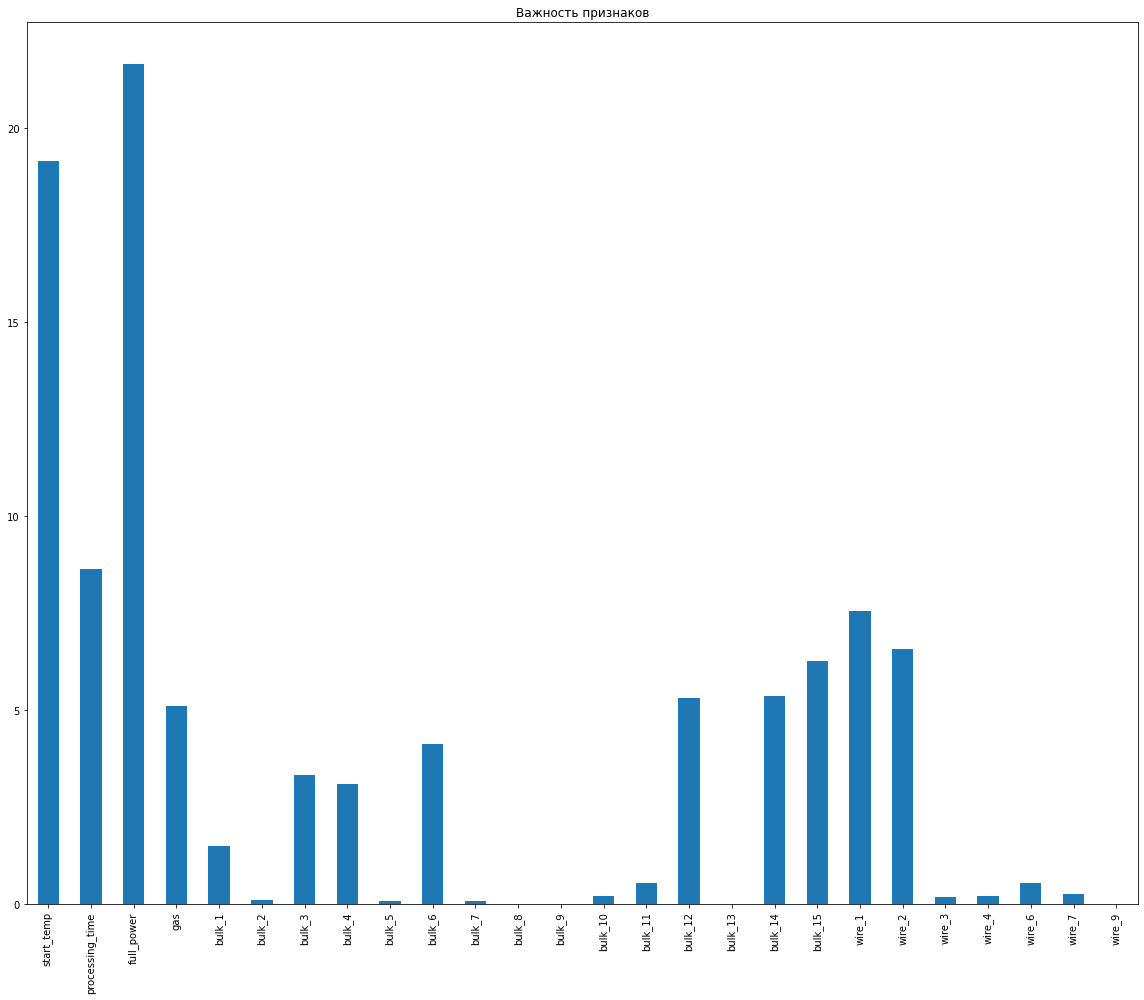

In [134]:
# Построим гистограмму для визуализации важности признаков
cat_wine_imp = pd.Series(cat_model.get_feature_importance(),
                         df_analysis.drop(['finish_temp'], axis=1).columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_wine_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

### Обучение модели LightGBM

In [139]:
%%time

lgbm = LGBMRegressor()

# Начало отсчета времени выполнения ячейки
start_time = time.time()

# Зададим подбираемые параметры
param_grid = {'learning_rate': [0.1, 0.3],
              'max_depth': [15, 20],
             }

grid_search = GridSearchCV(estimator = lgbm, 
                           param_grid = param_grid, 
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_mean_squared_error',
                          )

# Подберем параметры
grid_search.fit(features_train, target_train)

#Расчет времени выполнения ячейки
duration_gread = time.time() - start_time

print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 15}
CPU times: user 18.7 s, sys: 230 ms, total: 19 s
Wall time: 19.1 s


In [136]:
%%time

# Обучим модель с подобранными параметрами
lgbm = LGBMRegressor(learning_rate = 0.1, max_depth = 15)

# Начало отсчета времени обучения модели
start_time = time.time()

lgbm.fit(features_train, target_train)

#Расчет времени обучения модели
duration = time.time() - start_time

# Начало отсчета времени предсказания
start_time = time.time()

target_predict = lgbm.predict(features_valid)

#Расчет времени предсказания
# duration_pred = time.time() - start_time

# Расчет MAE
result_lgbm = mean_absolute_error(target_valid, target_predict)
print('MAE модели:', result_lgbm)

duration_pred = time.time() - start_time

# MAE на тестовой выборке
mae_test = mean_absolute_error(target_test, lgbm.predict(features_test))
print('MAE на тестовой выборке', mae_test)

# Сбор данных
summary('LGBMRegressor', duration, duration_pred, result_lgbm, duration_gread, mae_test)

MAE модели: 5.678695347151126
MAE на тестовой выборке 5.821291215416925
CPU times: user 5min 22s, sys: 3.38 s, total: 5min 25s
Wall time: 5min 27s


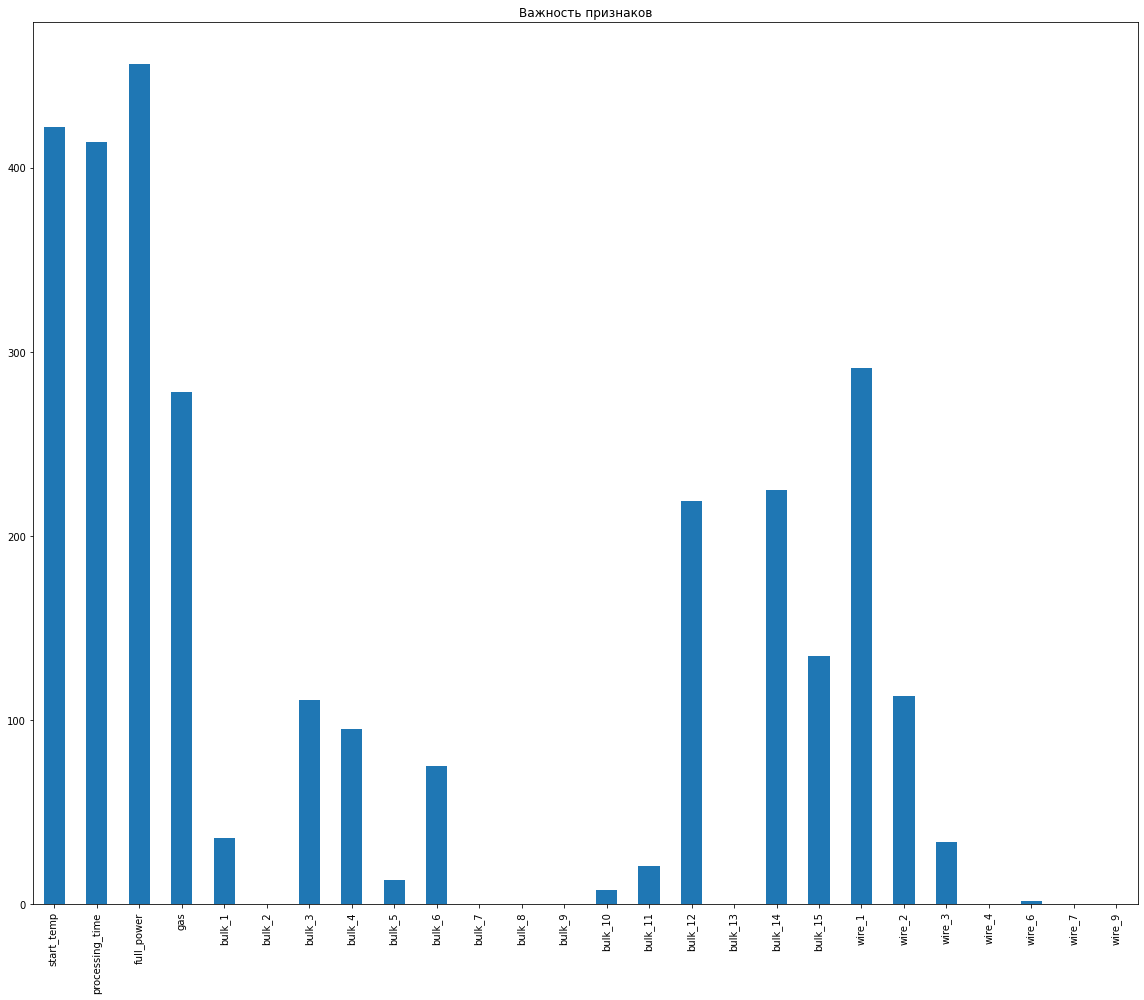

In [137]:
cat_wine_imp = pd.Series(lgbm.feature_importances_,
                         df_analysis.drop(['finish_temp'], axis=1).columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_wine_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков", Size=12)
fig.tight_layout()

###  Анализ работы моделей

In [138]:
# Сформируем датафрейм
results_df = pd.DataFrame(index=['Название модели', 'Продолжительность обучения модели, сек.', 'Продолжительность предсказания, сек.', 'Продолжительность подбора параметров', 'MAE модели', 'MAE на тестовой выборке'],
                          data=[model_list, duration_list, duration_pred_list, gread_time_list, mae_list, mae_test_list])

results_df

,0,1,2
Название модели,LinearRegression,CatBoostRegressor,LGBMRegressor
"Продолжительность обучения модели, сек.",0.003817,67.910149,327.558657
"Продолжительность предсказания, сек.",0.001687,0.008816,0.025304
Продолжительность подбора параметров,0,50.06585,50.06585
MAE модели,5.681775,5.767939,5.678695
MAE на тестовой выборке,5.625906,5.827019,5.821291


### Выводы

Были обучены три модели LinearRegression(), CatBoostRegressor() и LightGBM(), причем последние две с подбором гиперпараметров.
Выявлено, что лучшей моделью является LinearRegression с показателем MAE на тестовой выборке 5.625906

## Отчет

При выполнении работы за основу данных по технологическому процессу была взята работа "ТЕХНОЛОГИЯ КОМПЛЕКСНОЙ ОБРАБОТКИ СТАЛЕЙ НА АГРЕГАТЕ «КОВШ – ПЕЧЬ»" (https://portalpedagoga.ru/servisy/publik/publ?id=32382).
    
При обработке и подготовке данных, опираясь на вышеуказанную работу и справочные материалы (http://infofiz.ru/index.php/mirinf/item/363-shatalov , http://thermalinfo.ru/svojstva-materialov/metally-i-splavy/temperatura-plavleniya-i-kipeniya-metallov-plotnost-i-teplopro) были проведены следующие действия:

- Температура:
1. Удалены строки с температурой ниже 1350, как ошибочные
2. Удалены строки с отсутствующими данными о замере температуры
3. Удалены эксперименты с единственным замером
4. Добавлен столбец с продолжительностью нагрева
- Работа электродов:
1. Удалена ошибочная запись, содержащую показатель реактивной мощности равный -715.504924
2. Исключены все партии с нагревом после последнего замера
- Данные о подаче сыпучих материалов:
1. Удалены партии, в которых засыпка проводилась после последнего измерения температуры
- Данные о подаче проволоки:
1. Удалим партии, в которых проволока подавалась проводилась после последнего измерения температуры
- Подготовка датафрейма:
1. После формирования датафрейма для модели проверили на наличие данных во всех ячейках, обнаружили, что в столбце 'wire_5' все значения равны 0, соответственно его удалили
- Оценка мультиколлинеарности:
1. Построив Хитмэп выявили зависимости между full_power и heating_duration и bulk_9 и wire_8 удалили из датафрейма heating_duration (продолжительность нагрева) и wire_8 (подача проволоки, столбец 8).
    
Подготовленный датафрейм был разбит на выборки - тренировочную, валидационную и тестовую

Были обучены три модели LinearRegression(), CatBoostRegressor() и LightGBM(), причем последние две с подбором гиперпараметров. Выявлено, что лучшей моделью является LinearRegression с показателем MAE на тестовой выборке 5.625906. Гистограммы важности признаков были построены для всех трех моделей.

Как рекомендация заказчику для улучшения модели и, как следствие, достижение положительного экономического эффекта:
- уточнить разброс показателей температур (имеется в виду как погрешность измерения, так и вероятно существующие нормальные температуры)
- добавить данные по учету себестоимости добавляемых материалов (оценочное сравнение стоимости матераилов и стоимости электричества)
- добавить учет переметра, отражающего замену огнеупорной кладки ковша (оценка влияния события на трату электроэнергии на прогрев)
- добавить учет стоимости эксплуатации компенсаторов реактивной мощности (как фактор, влияющий на потребление электроэнергии)
- добавить замеры температуры на всех этапах производства (последовательность происходящих действий с расплавом с высокой вероятностью влияет как на результат, так и на энергозатраты). В дальнейшем можно предсказывать и промежуточные температуры.
    
Ответы на вопросы:
    
- Какие пункты плана были выполнены, а какие — нет (поясните почему)?

Все пункты плана были выполнены    
    
- Какие трудности возникли и как вы их преодолели?
    
На первом этапе основной трудностью стал поиск информации по технологии производства, без понимания которой сложно делать выбор параметров и оценивать адекватность данных. 
    
- Какие ключевые шаги в решении задачи выделили?
    
1. Ознакомление с технологией работы агрегата ковш печь
2. Анализ и подготовка данных
3. Подготовка датафрейма для дальнейшего анализа
4. Разделение датафрейма на выборки
5. Обучение моделей с оценкой важности факторов и выбором лучшей модели
    
- Какая ваша итоговая модель и какое у неё качество?

Наилучший результат показала модель LinearRegression, с показателем МАЕ на тестовой выборке - 5.625906		
    
